## Welcome!

Welcome to the Zero to GPT course!  This course will take you from no deep learning knowledge to being able to train your own GPT model.

At a high level, GPT works by predicting what words should come after your prompt.  Here's an example of some text you can feed into GPT, and a response:

![gpt text](images/intro/gpt_text.svg)

GPT models are types of deep learning models.  Deep learning is a subfield of machine learning, which is a subfield of AI.  In deep learning, we train a neural network composed of many layers to transform an input into an output.

Neural networks can't understand text directly, so GPT has to convert your prompt to numbers, make predictions, then convert the predictions back to text.  The process works like this at a very high level:

![gpt steps](images/intro/gpt_steps.svg)


The key part of GPT is the prediction step, where the network predicts what words will come next.  To do this, the network uses its parameters.  You can think of parameters like memory.  This memory has been trained on a lot of data (gigabytes or terabytes).  Parameters enable neural networks to make accurate predictions about what should come after your prompt.

The smallest GPT models have around 100M parameters, and the largest have 176B.  They use parameters to transform your input to predictions - usually by adding the parameters to your input, or multiplying your input by the parameters.

By the end of this course, you'll understand how to train deep neural networks that work like GPT.  This course is split up into three parts:

1. Understanding deep learning - how to create and train deep neural networks, including gradient descent and backpropagation.
2. Deep learning for NLP - deep learning architectures to work with text, including RNNs, encoder/decoders, attention, and transformers.
3. Scaling up models - putting together the building blocks to train a model with a large number of parameters.

Check out the [README](https://github.com/VikParuchuri/zero_to_gpt/blob/master/README.md) for a full lesson overview.

## Teaching method

This course will get you ready to do meaningful work with deep learning.  We'll balance theory and practical application.  Without theory, you won't understand how to apply deep learning in the real world.  But theory shouldn't overwhelm - it should aid you in actually doing the work.

In each lesson, you'll learn the theory behind what you're doing, and code complete implementations that solve problems.  For example, in the dense neural networks lesson, you'll learn the theory - backpropagation, why nonlinearities are useful, and how multiple layers work.  Then you'll code a complete neural network using NumPy that predicts the weather.

I'll explain concepts in multiple ways - diagrams, text, code, and video.  Deep learning is complicated, and it can take multiple explanations before a concept clicks.

### What this course is not

- This is not a course where you'll just import PyTorch and type code without understanding what you're doing.  We'll build up your knowledge step by step.
- This is not a mathematically rigorous course.  We'll include the math, but we'll focus on building intuition and understanding first.  For a mathematically rigorous resource, I recommend the [deep learning book](https://www.deeplearningbook.org/).

## Who am I?

My name is Vik Paruchuri.  I've won ML competitions, worked as an ML engineer, and started Dataquest, which has taught data skills to 1M+ people.  Before all that, I was a self-taught programmer who dreamed of predicting the stock market.

This course is for anyone dreaming of building their own deep learning models.

## Prerequisites

This course is designed to be accessible.  You'll need to understand Python to take this course, including for loops, functions, and classes.  The first part of [this Dataquest path](https://www.dataquest.io/path/data-scientist/) will teach you what you need.

Experience with [NumPy](https://www.dataquest.io/course/pandas-fundamentals) and linear algebra will also help.  If you don't have any experience, we'll cover some basics in the rest of this lesson.

If you already know NumPy, feel free to skip to the [next lesson](https://github.com/VikParuchuri/zero_to_gpt/blob/master/explanations/linreg.ipynb).

## NumPy fundamentals

NumPy is a Python package that enables us to work with arrays of data more efficiently.

To understand why we need NumPy, let's start with one of the fundamental machine learning algorithms, linear regression.  In linear regression, we make a prediction using the equation $\hat{y} = wx + b$.  In deep learning, we call $w$ the weight, and $b$ the bias.

Let's say that we want to predict tomorrow's temperature using three data points from today - today's max temperature, today's min temperature, and how much it rained today.

Let's read in our dataset using pandas:

In [21]:
import pandas as pd

# Read in the data
data = pd.read_csv("../data/clean_weather.csv", index_col=0)
# Fill in any missing values in the data with past values
data = data.ffill()

# Show the first 5 rows of the data
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In the table above, tomorrow's temperature is `tmax_tomorrow`, today's max temperature is `tmax`, today's min temperature is `tmin`, and how much it rained today is `rain`.

We have data from `1970` to the present.  With linear regression, we can extend our equation to multiple predictors like this:

$$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$$

So to get a prediction for tomorrow's temperature $\hat{y}$, we can take a value called $w_{1}$, and multiply it by `tmax`, then take $w_{2}$ and multiply it by `tmin`, then take $w_{3}$ and multiply it by `rain`.  We'd then add in $b$.  Here's how that could look:

In [22]:
.7 * 60 + .3 * 35 + .1 * 0 + 10

62.5

The above could be our prediction for the first row of the data, if our $w$ values are `.7`, `.3`, and `.1`, and our $b$ value is `10`.  We'll discuss how you can calculate the correct $w$ and $b$ values in the next lesson, but for now, let's just use these values.

Whenever we want to make a new prediction, we apply the same equation:

In [23]:
w1 = .7
w2 = .3
w3 = .1
b = 10

w1 * 52 + w2 * 39 + w3 * 0 + b

58.099999999999994

## Matrix Multiplication

What if instead of 3 predictor variables (`tmax`, `tmin`, and `rain`), we had `10`?  Or `100`?  It would get annoying to keep track of that many individual $w$ values.

Luckily, we can use linear algebra to help us out.  Matrix multiplication is a linear algebra operation defined like this:

$$
\begin{equation}
    A \times B =
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_{11} \\
    b_{21}
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_{11}b_{11} + a_{12}b_{21} \\
      a_{21}b_{11} + a_{22}b_{21}
    \end{bmatrix}
\end{equation}
$$

We can visualize how it works with this gif:

![Matrix mult](images/intro/matrix_mult.gif)

As you can see, we essentially take each row of matrix A and multiply it by each column of matrix B, then add everything together.  The number of columns in the first matrix has to equal the number of rows in the second matrix.

This is very useful to us when we're multiplying weights by input numbers.  We can take our $x$ values, put them into a matrix, then multiply by the weights (also in a matrix):

In [24]:
# Convert the first 3 rows of data into a numpy matrix from a pandas dataframe
# the first column of the matrix is tmax, second is tmin, third is rain

x = data[["tmax", "tmin", "rain"]].iloc[:3].to_numpy()
x

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [25]:
import numpy as np

# Create a matrix with our weights

w = np.array([.7, .3, .1])

w

array([0.7, 0.3, 0.1])

We can verify the shapes of our matrices to make sure they can be multiplied:

In [26]:
# Print the shape (number of rows and columns) in x
x.shape

(3, 3)

In [27]:
# Print the shape of w
w.shape

(3,)

As we can see, `x` is a matrix with `3` rows and `3` columns.  `w` is actually a vector with `3` columns.  A vector is known as a one-dimensional array, because it only has length in a single dimension.

You can also get arrays with more than 2 dimensions, which we'll work with in later lessons.  Each dimension of the array will have a length corresponding to the size in that dimension.

`x` has length `3` in dimension `0` (rows) and dimension `1` columns.  `w` has length `3` in dimension `0`.

We'll need to convert `w` from a vector into a matrix to multiply our two matrices.  To do that, we can use the numpy `reshape` method.  We pass in our desired lengths in each dimension:

In [28]:
# Reshape w into a 3 by 1 matrix
# The new dimensions must match the number of elements in w
w = w.reshape(3,1)
w

array([[0.7],
       [0.3],
       [0.1]])

In [29]:
w.shape

(3, 1)

We now have a `3x3` matrix, and a `3x1` matrix.  Since the number of columns in `x` matches the number of rows in `w`, we can multiply them:

In [30]:
x @ w

array([[52.5],
       [48.1],
       [46.9]])

We can now add in our $b$ value, `10`.  $b$ is just a single number.  When we add it to `x @ w`, it will be broadcasted across the matrix (added to each element):

In [31]:
b = np.array([10])
x @ w + b

array([[62.5],
       [58.1],
       [56.9]])

This gives us the same results as when we manually multiplied our `w` and `x` values:

In [32]:
w1 = .7
w2 = .3
w3 = .1
b = 10

w1 * 60 + w2 * 35 + w3 * 0 + b

62.5

This is the power of matrix multiplication - it enables us to store all of our parameters ($w$ and $b$ values) into arrays and then use them to modify our inputs.  This is a lot faster than keeping track of each individual variable!

## Matrix Transposition

Sometimes we'll need to swap dimensions in a matrix.  This is called matrix transposition.  For example, another way to multiply each row in `x` by each weight is to multiply the transposed weights by the transposed x values:

In [33]:
# Use .T to get the transpose of a matrix
w.T @ x.T + b

array([[62.5, 58.1, 56.9]])

Transposition takes the `3x1` weight matrix, and turns it into a `1x3` matrix.  It then transposes the `3x3` x matrix.  The dimensions of x will stay the same, but transposition will switch the rows and columns:

In [34]:
w.T

array([[0.7, 0.3, 0.1]])

In [35]:
x.T

array([[60., 52., 52.],
       [35., 39., 35.],
       [ 0.,  0.,  0.]])

`w.T @ x.T` will multiply each column in the weight matrix by each row in the x matrix.  This is the exact same thing that will happen when we do `x @ w`.  It's just that `w.T @ x.T` returns a `1x3` matrix, and `x @ w` returns a `3x1` matrix.  So we need to do another transposition to correct this:

In [36]:
# The numpy allclose function tells us if two matrices are approximately equal
np.allclose((w.T @ x.T).T, x @ w)

True

Above, we use `np.allclose` to ensure that both multiplications return the same result.  When comparing the results of matrix multiplication we usually use `np.allclose` instead of `==` because the way computers represent floating point numbers can cause the same number to appear slightly differently.  You can see an explanation for this [here](https://floating-point-gui.de/).

## Broadcasting

Earlier, we used broadcasting to add the bias `b` to the result of `x @ w`.  Broadcasting enables arrays with compatible shapes to be added or multiplied.

If shapes are compatible, it means that:
* The smaller array has all of its dimensions exactly matching the length dimensions of the larger array
* Or the smaller array is length 1 in the non-matching dimensions.

Here are some examples:

In [37]:
# np.ones enables us to create an array filled with ones of a certain shape

A = np.ones((5,1))

# This works
A + np.ones((1,1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [38]:
# This works
A + np.ones((1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [39]:
# This does not work
A + np.ones((2,1))

ValueError: operands could not be broadcast together with shapes (5,1) (2,1) 

We can also use broadcasting to multiply individual elements:

In [ ]:
# np.full initializes an array filled with a given value
# Using the * means that each element in array b is multiplied by the elements in array b
A * np.full((1,1), 2)

In [ ]:
# np.random.rand generates random numbers between 0 and 1 of a given shape
A * np.random.rand(5,1)

## Scalar Math

Arrays can also be modified by scalars (single numbers):

In [ ]:
# np.zeros creates an array filled with zeros
# We then add 5 to each value in the array
np.zeros((5,1)) + 5

## Array Indexing

In NumPy, we can refer to individual elements in arrays using their index.  Indexing starts at 0, just like with Python lists:

In [ ]:
# Create a 3-dimensional array
B = np.random.rand(2,2,2)

# Select a single element
B[0,1,1]

In [ ]:
# Select a slice from dimension 2 (the last dimension)

B[0,1,:]

In [ ]:
# Select a 2-d slice from the last 2 dimensions
B[0]

In [ ]:
# Select up to 1 element from the last element
B[:,:,:1]

We can also assign to elements using indexing:

In [ ]:
B[0,0,:] = 5
B

## Derivatives

The last piece of math you'll need to understand for deep learning is derivatives.  Derivatives tell us the rate of change of a function.  For example, the derivative of $f(x) = x^2$ is $f'(x) = 2x$.  This means that the rate of change of $x^2$ is $2x$.

Let's look at how this works, by first plotting $f(x) = x^2$:

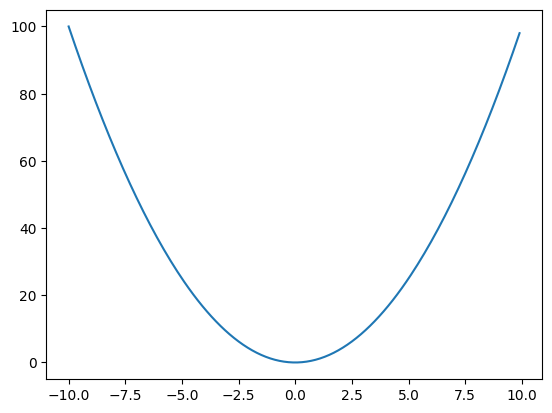

In [41]:
import matplotlib.pyplot as plt

# Create a list of numbers from -10 to 10, stepping by .1
xs = np.arange(-10, 10, .1)
# Square all of our x values
ys = xs ** 2

# Plot the result
plt.plot(xs, ys)

The function graph has a curved shape.  This is because the difference between y values is increasing as x gets further from `0`.   For example, if x is positive, $(x+2) ^ 2 - (x+1) ^ 2$ is greater than $(x+1) ^ 2 - x ^ 2$.

As you can see below, the derivative is the slope between 2 points on the function curve.

![slope](images/intro/slope.png)

We can calculate the slope by the equation $\frac{y_2 - y_1}{x_2 - x_1}$, where $x_2$ and $x_1$ are the x values of 2 points, and $y_2$ and $y_1$ are the y values of the same points.

In [46]:
# Find 2 x points close to 5
x1 = 5 - 1e-8
x2 = 5 + 1e-8

# Calculate the corresponding y values
y1 = x1 ** 2
y2 = x2 ** 2

# Calculate the slope (or derivative)
# This will equal 2 times the midpoint of the x values (5)
(y2 - y1) / (x2 - x1)

10.0

Derivatives are at a single point, so we would say that $f'(5) = 10$.  This means that the rate of change of $x^2$ at $x=5$ is $10$.

We can now plot the derivative, $f'(x) = 2x$:

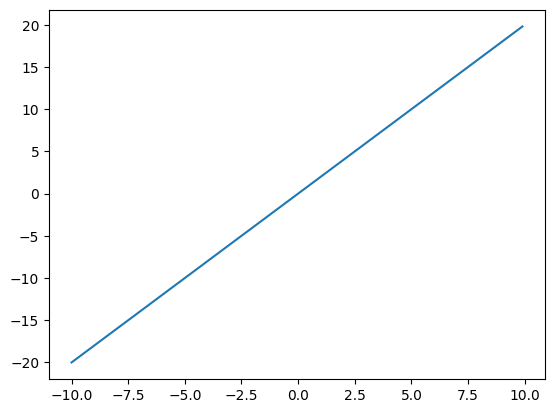

In [42]:
ys = xs * 2

# Plot the derivative
plt.plot(xs, ys)

Derivatives are important for training neural networks.  They allow us to determine whether to increase or decrease our parameters.  We'll learn more about this in the next lesson.

You usually don't need to know how to calculate the derivative yourself.  You'll usually be given the derivative of the function beforehand.  In a later lesson, we'll discuss how to calculate the derivative if you need to.

## Wrap-up

In the next lesson, we'll build on what we learned here to automatically calculate the correct $w$ and $b$ values for linear regression.  This is a key building block of neural networks called gradient descent.  I hope to see you there!